# 21일차

## 머신러닝

### 머신러닝의 체크 포인트
- 학습데이터와 테스트데이터 분리
- 정규화 (스케일 문제)
- 과적합

### 연습문제
- 행복데이터를 불러온다
- 6개의 핵심 속성을 X, 행복지수를 y 로 불러온다
- 학습/테스트 데이터 분리 (train_test_split)
- X 값의 boxplot 을 그리고, 정규화를 적용한다

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
happy=pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [61]:
X=happy.iloc[:,6:12].values
y=happy['Ladder score'].values
X.shape,y.shape

((149, 6), (149,))

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [64]:
X_train.shape,X_test.shape

((119, 6), (30, 6))

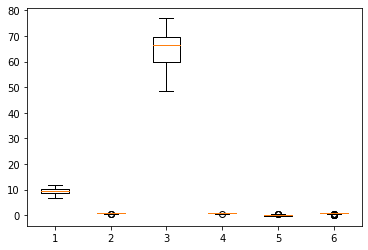

In [65]:
plt.boxplot(X);pass

In [66]:
X_train_norm=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)

In [67]:
X_test_norm=(X_test-X_train.mean(axis=0))/X_train.std(axis=0)

### 유방암 데이터

In [127]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [128]:
X=cancer.data
y=cancer.target # 0:maliganat,1:benign

In [129]:
np.bincount(y)

array([212, 357], dtype=int64)

In [106]:
X_norm=(X-X.mean(axis=0))/X.std(axis=0)

In [107]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

### Support Vector Machine (SVM)

In [108]:
from sklearn.svm import SVC

In [109]:
model=SVC()

In [110]:
model.fit(X_train,y_train)

SVC()

In [111]:
pred_y=model.predict(X_test)
pred_y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [112]:
model.score(X_test,y_test) # (pred_y==y_test).mean()

0.9090909090909091

In [113]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9370629370629371

### 정규화 적용

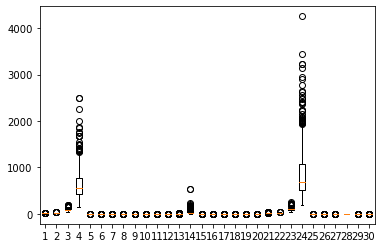

In [114]:
plt.boxplot(cancer.data); pass

In [115]:
X_train_norm=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test_norm=(X_test-X_train.mean(axis=0))/X_train.std(axis=0)

In [116]:
model=SVC()

In [117]:
model.fit(X_train_norm,y_train)

SVC()

In [118]:
pred_y=model.predict(X_test_norm)
pred_y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [119]:
model.score(X_test_norm,y_test)

0.9790209790209791

In [120]:
model=SVC()
model.fit(X_train_norm,y_train)
s1=model.score(X_train_norm,y_train)
s2=model.score(X_test_norm,y_test)
s1,s2

(0.9882629107981221, 0.9790209790209791)

In [121]:
model=SVC(C=100)
model.fit(X_train_norm,y_train)
s1=model.score(X_train_norm,y_train)
s2=model.score(X_test_norm,y_test)
s1,s2

(1.0, 0.951048951048951)

In [122]:
model=SVC(C=10)
model.fit(X_train_norm,y_train)
s1=model.score(X_train_norm,y_train)
s2=model.score(X_test_norm,y_test)
s1,s2

(0.9929577464788732, 0.965034965034965)

In [123]:
model=SVC(C=0.1)
model.fit(X_train_norm,y_train)
s1=model.score(X_train_norm,y_train)
s2=model.score(X_test_norm,y_test)
s1,s2

(0.9507042253521126, 0.965034965034965)

### 과적합 이슈

In [124]:
model=SVC(gamma=100)
model.fit(X_train_norm,y_train)
s1=model.score(X_train_norm,y_train)
s2=model.score(X_test_norm,y_test)
s1,s2

(1.0, 0.6083916083916084)

In [125]:
model=SVC(gamma=0.01)
model.fit(X_train_norm,y_train)
s1=model.score(X_train_norm,y_train)
s2=model.score(X_test_norm,y_test)
s1,s2

(0.9741784037558685, 0.9790209790209791)

In [126]:
np.bincount(y_test)/143

array([0.39160839, 0.60839161])

In [131]:
gs=np.array([0.01,0.1,1,10,100])

In [132]:
train_s=[]
test_s=[]

for g in gs:
    model=SVC(C=10,gamma=g)
    model.fit(X_train_norm,y_train)
    s1=model.score(X_train_norm,y_train)
    s2=model.score(X_test_norm,y_test)
    train_s.append(s1)
    test_s.append(s2)
    
display(train_s,test_s)

[0.9882629107981221, 1.0, 1.0, 1.0, 1.0]

[0.972027972027972,
 0.951048951048951,
 0.6083916083916084,
 0.6083916083916084,
 0.6083916083916084]